1. Use fig.add[h/v]line()_ and fig.add[h/v]rect()_ to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset



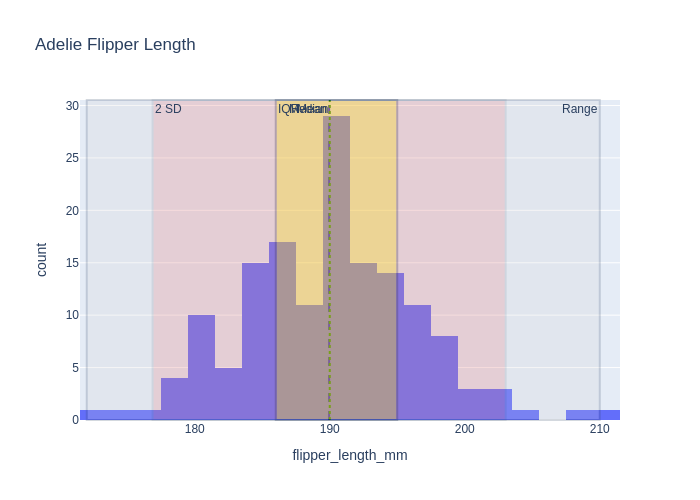

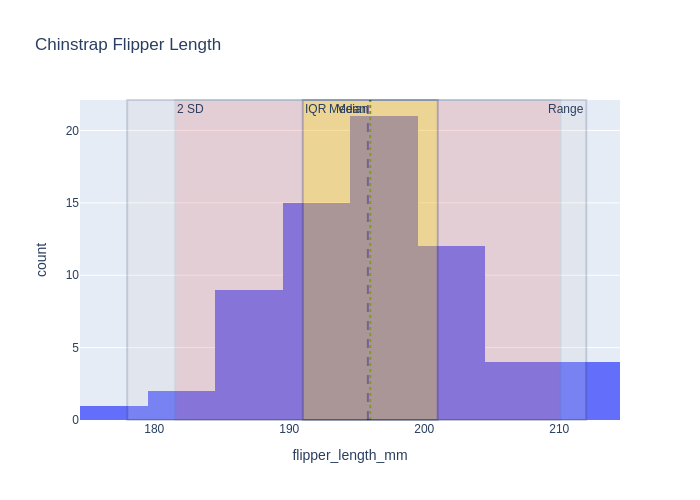

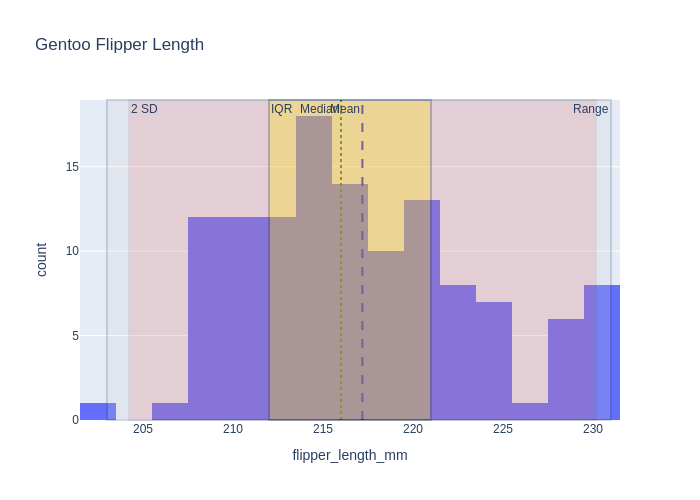

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins").dropna(subset=['flipper_length_mm'])

# Define function to create histogram with mean, median, and scale markers
def create_histogram_with_lines_and_rects(species_name, species_data):
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    
    # Create histogram
    fig = px.histogram(species_data, x='flipper_length_mm', title=f'{species_name} Flipper Length')
    
    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text='Median', annotation_position="top left")
    
    # Add range (min-max) rectangle
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='lightgrey', opacity=0.2, annotation_text="Range")
    
    # Add IQR rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor='yellow', opacity=0.3, annotation_text="IQR", annotation_position="top left")
    
    # Add 2 standard deviations rectangle
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor='red', opacity=0.1, annotation_text="2 SD", annotation_position="top left")
    
    return fig

# Filter data by species and create a plot for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    fig = create_histogram_with_lines_and_rects(species, species_data)
    fig.show(renderer="png")


summary
https://chatgpt.com/share/66ee2d71-6634-8001-8775-aa573a78d74c
In our interaction, you asked how to use Plotly functions fig.add_hline(), fig.add_vline(), fig.add_hrect(), and fig.add_vrect() to visualize the central tendency and scale of the flipper_length_mm variable for each species in the penguins dataset. I provided a Python code example that creates histograms with markers for the mean, median, range, interquartile range (IQR), and the range defined by two standard deviations from the mean. Then, I explained what these functions do in both English and Chinese, describing how they add lines and rectangles to mark specific values and ranges on the plot.

2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots



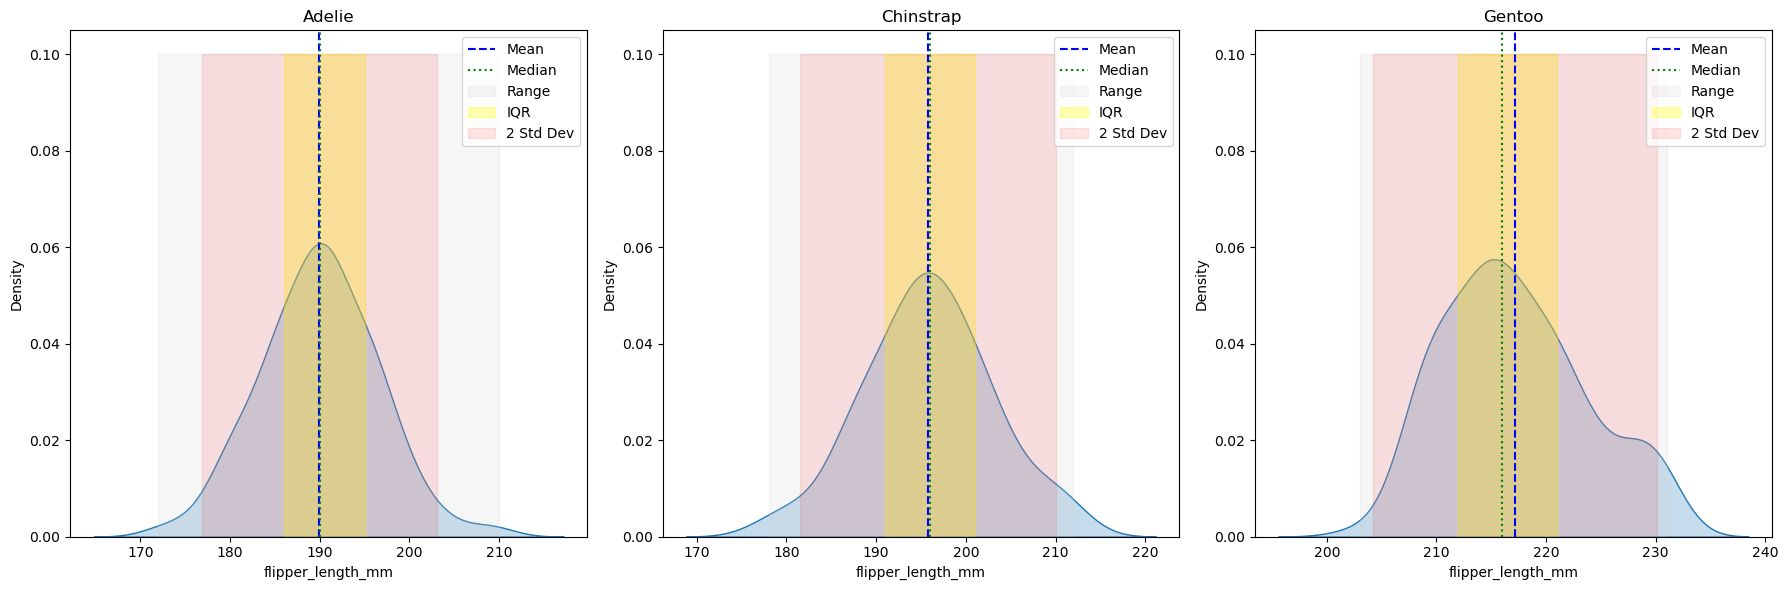

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins").dropna(subset=['flipper_length_mm'])

# Function to plot KDE with mean, median, range, IQR, and 2 std deviation
def plot_kde_with_stats(ax, species_name, species_data):
    flipper_length = species_data['flipper_length_mm']
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    
    # Plot KDE
    sns.kdeplot(flipper_length, ax=ax, fill=True)
    ax.set_title(f'{species_name}')
    
    # Add mean and median lines
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle=':', label='Median')
    
    # Add range (min to max) shaded area
    ax.fill_betweenx([0, 0.1], min_val, max_val, color='lightgrey', alpha=0.2, label='Range')
    
    # Add IQR (Q1 to Q3) shaded area
    ax.fill_betweenx([0, 0.1], q1, q3, color='yellow', alpha=0.3, label='IQR')
    
    # Add 2 Standard Deviation range
    ax.fill_betweenx([0, 0.1], mean - 2 * std, mean + 2 * std, color='red', alpha=0.1, label='2 Std Dev')
    
    ax.legend()

# Set up the plot grid (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for each species
species_list = penguins['species'].unique()
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    plot_kde_with_stats(axes[i], species, species_data)

plt.tight_layout()
plt.show()


summary
https://chatgpt.com/share/66ee2d71-6634-8001-8775-aa573a78d74c
In this interaction, you asked how to use Seaborn's Kernel Density Estimation (KDE) plots to visualize the flipper length distribution for each species in the penguins dataset. I provided a Python solution that creates KDE plots, marks the mean and median with vertical lines, and shades regions for the range, interquartile range (IQR), and two standard deviations from the mean. The plots are arranged in a row of three, one for each species. I also explained the code in both English and Chinese, covering key details like statistical markers and plot customization.

3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

1.I think box plots are suitable for some datasets that need to be able to intuitively see the median, mean, and outliers, histograms are suitable for simple datasets that only need to see the size of the corresponding data in a certain range, and kernel density estimators are suitable for complex datasets that need to see subtle changes, but I think kernel density estimators and histograms are a bit similar. Do you think my opinion is right? Please correct me

2.Your observations are quite insightful!

Box plots are indeed great for highlighting medians, quartiles, and outliers, making them useful for comparing distributions between groups.
Histograms provide a clear picture of data distribution within defined bins, which is ideal for understanding the frequency of data points across ranges.
Kernel density estimators (KDEs) offer a smoother representation of the data distribution and can reveal underlying patterns that might be obscured in histograms, especially with small sample sizes or when bins are poorly chosen.
You're right that KDEs and histograms can feel similar since they both visualize data distributions, but KDEs often provide a more continuous view, which can highlight subtler features in the data. Your distinctions are valid, and your perspective on their applications is well-founded!


3.Here’s a pros and cons list for box plots, histograms, and kernel density estimators:
Box Plots
Pros:

Clearly shows median, quartiles, and outliers.
Useful for comparing multiple groups side by side.
Requires less space compared to other plots.
Handles small datasets well.
Cons:

Doesn't provide detailed information about the distribution shape.
Can be misleading if the dataset has many outliers.
Limited information if there are too few data points.
Histograms
Pros:

Simple to understand and interpret.
Shows the shape of the distribution (e.g., normal, skewed).
Good for large datasets and capturing frequency of data points.
Easy to create and customize.
Cons:

Bin size can significantly affect the appearance and interpretation.
Can obscure data features if bins are too wide or too narrow.
Less effective for comparing multiple distributions simultaneously.
Kernel Density Estimators (KDEs)
Pros:

Provides a smooth estimate of the distribution.
Can reveal subtle patterns that histograms may miss.
Flexible with bandwidth selection for different levels of detail.
Works well with smaller datasets.
Cons:

Choice of bandwidth can greatly influence results; poor choices can mislead.
More complex to interpret than histograms or box plots.
Can be computationally intensive for very large datasets.
Sensitive to the underlying data distribution; may produce artifacts.

# I prefer box plots because I can intuitively see the median, mean, and outliers of the data, while histograms are prone to errors, and kernel density estimators are too complicated to be hand-drawn

summary
https://chatgpt.com/share/66ee3620-adc0-8001-9ceb-a295a666084e
In our interaction, we discussed the suitability of box plots, histograms, and kernel density estimators (KDEs) for visualizing data distributions. You shared your insights on each method, highlighting their strengths and weaknesses. We then created a pros and cons list for each visualization technique, summarizing their key features and considerations. Finally, I provided a Chinese explanation of the summary. If you need further clarification or have more questions, feel free to ask!

4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

Which datasets have similar means and similar variances
Which datasets have similar means but quite different variances
Which datasets have similar variances but quite different means
Which datasets have quite different means and quite different variances

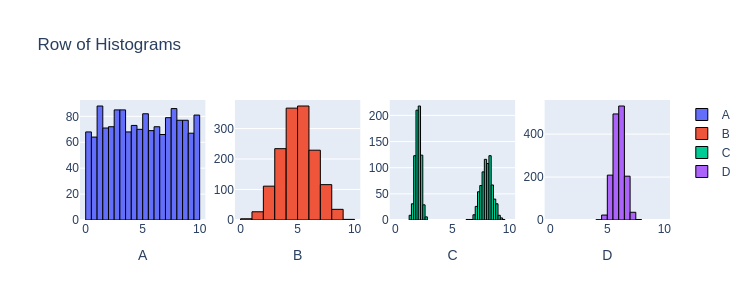

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Similar Means and Similar Variances:
Data 1 (Uniform: mean ≈ 5) and Data 2 (Normal: mean = 5, SD = 1.5):
Both have similar means, but the variances are different (Data 1 has a higher variance).
2.Similar Means but Quite Different Variances:
Data 2 (mean = 5) and Data 4 (Normal: mean = 6, SD = 0.5):
These means are close, but Data 2 has a higher variance compared to Data 4.
3.Similar Variances but Quite Different Means:
Data 3 (mixture) and Data 4 (mean = 6, SD = 0.5):
Data 3 has components that can result in a variance similar to Data 4, but their means (around 5 and 6 respectively) are quite different.
4.Quite Different Means and Quite Different Variances:
Data 1 (Uniform) and Data 3 (mixture):
Data 1 has a uniform distribution (mean ≈ 5) and a broad variance, while Data 3 has two modes (means around 2 and 8) and a different variance profile.

summary of our interaction:
https://chatgpt.com/share/66ee3738-23cc-8001-a1a0-644c641f91d9
Code Review: You shared a Python script using Plotly to create histograms for four datasets generated from different distributions. We discussed the data generation process and the layout of the histograms.

Statistical Analysis: You asked for an analysis of the datasets based on their means and variances. I categorized the datasets into four groups:

# Similar Means and Similar Variances: Data 1 and Data 2 (though variances differ).
# Similar Means but Quite Different Variances: Data 2 and Data 4.
# Similar Variances but Quite Different Means: Data 3 and Data 4.
# Quite Different Means and Quite Different Variances: Data 1 and Data 3.

5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

In [9]:
from scipy import stats
import pandas as pd
import numpy as np
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

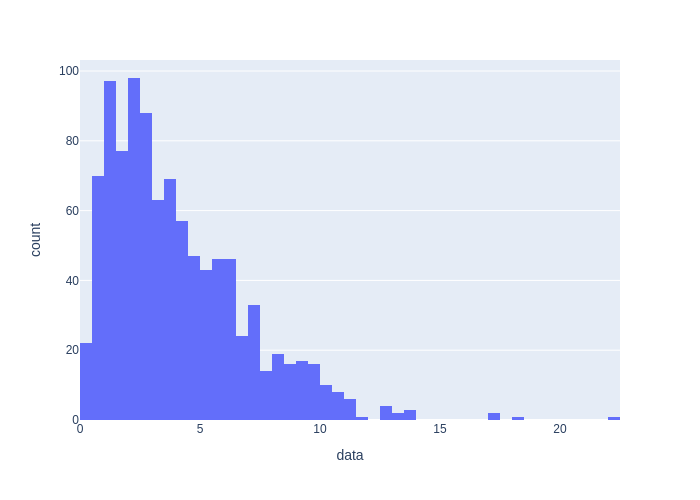

4.06354420175285
[3.36195576]


In [10]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px 
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

fig1.show(renderer="png")

print(sample1.mean()) 
print(np.quantile(sample1, [0.5])) 
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)


# The median is around 2 and the mean is "right" because a large number of counts are concentrated between 0 and 10

summary
https://chatgpt.com/share/66f21495-7ec4-8001-a18b-8bf9a5841eb8
In our interactions, we explored several topics related to data analysis, focusing on distributions and visualizations. You initially sought datasets with missing values and discussed their analysis, using the Titanic dataset as an example. You considered different data visualization techniques, particularly box plots, histograms, and kernel density estimators. We also discussed coding issues, such as generating random samples from a gamma distribution and analyzing the relationship between mean and median in a right-skewed dataset. Along the way, you encountered a coding error (NameError: name 'px' is not defined), which we resolved by importing the correct module, plotly.express. Overall, we focused on the statistical properties of skewed distributions and their visual representation, emphasizing the role of the mean and median in skewed datasets.


6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

Your approach should likely follow what was suggested for the Week 02 TUT Communication Activity from TUT
In the Week 03 TUT Communication Activity from TUT you will be put in groups and determine which group members dataset introduction will be presented by the group

In [27]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv")
df # df.columns

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,159.99,199.99,149.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,199.99,229.99,179.99,Box,Retail - limited
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,99.99,119.99,89.99,Box,LEGO exclusive
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,79.99,NaN,69.99,Box,LEGO exclusive
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,9.99,12.99,9.99,Box,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,647,Lorry With Girders,1971,LEGOLAND,Vehicle,52.0,NaN,http://images.brickset.com/sets/images/647-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6168,648,Service Station,1971,LEGOLAND,Building,55.0,NaN,http://images.brickset.com/sets/images/648-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6169,795,"2 Large Baseplates, Red/Blue",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/795-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified
6170,796,"2 Large Baseplates, Green/Yellow",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/796-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv"
lego_data = pd.read_csv(url)

# Display the first few rows and summary information about the dataset
lego_data_info = lego_data.info()
lego_data_head = lego_data.head()

lego_data_info, lego_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Item_Number   6172 non-null   object 
 1   Name          6172 non-null   object 
 2   Year          6172 non-null   int64  
 3   Theme         6172 non-null   object 
 4   Subtheme      3966 non-null   object 
 5   Pieces        6060 non-null   float64
 6   Minifigures   3500 non-null   float64
 7   Image_URL     6172 non-null   object 
 8   GBP_MSRP      4192 non-null   float64
 9   USD_MSRP      5817 non-null   float64
 10  CAD_MSRP      1982 non-null   float64
 11  EUR_MSRP      1773 non-null   float64
 12  Packaging     6172 non-null   object 
 13  Availability  6172 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 675.2+ KB


(None,
   Item_Number                Name  Year            Theme           Subtheme  \
 0       10246  Detective's Office  2015  Advanced Models  Modular Buildings   
 1       10247        Ferris Wheel  2015  Advanced Models         Fairground   
 2       10248         Ferrari F40  2015  Advanced Models           Vehicles   
 3       10249            Toy Shop  2015  Advanced Models     Winter Village   
 4       10581               Ducks  2015            Duplo     Forest Animals   
 
    Pieces  Minifigures                                          Image_URL  \
 0  2262.0          6.0  http://images.brickset.com/sets/images/10246-1...   
 1  2464.0         10.0  http://images.brickset.com/sets/images/10247-1...   
 2  1158.0          NaN  http://images.brickset.com/sets/images/10248-1...   
 3   898.0          NaN  http://images.brickset.com/sets/images/10249-1...   
 4    13.0          1.0  http://images.brickset.com/sets/images/10581-1...   
 
    GBP_MSRP  USD_MSRP  CAD_MSRP  EUR_MSR

In [39]:
# Calculate summary statistics for key variables
summary_statistics = lego_data[['Year', 'Pieces', 'Minifigures']].describe()

# Check for missing values in the dataset
missing_values = lego_data.isnull().sum()

summary_statistics, missing_values


(              Year       Pieces  Minifigures
 count  6172.000000  6060.000000  3500.000000
 mean   2004.712087   215.168647     2.845429
 std       8.914686   356.197637     2.720965
 min    1971.000000     0.000000     1.000000
 25%    2000.000000    30.000000     1.000000
 50%    2006.000000    82.000000     2.000000
 75%    2012.000000   256.250000     4.000000
 max    2015.000000  5922.000000    32.000000,
 Item_Number        0
 Name               0
 Year               0
 Theme              0
 Subtheme        2206
 Pieces           112
 Minifigures     2672
 Image_URL          0
 GBP_MSRP        1980
 USD_MSRP         355
 CAD_MSRP        4190
 EUR_MSRP        4399
 Packaging          0
 Availability       0
 dtype: int64)

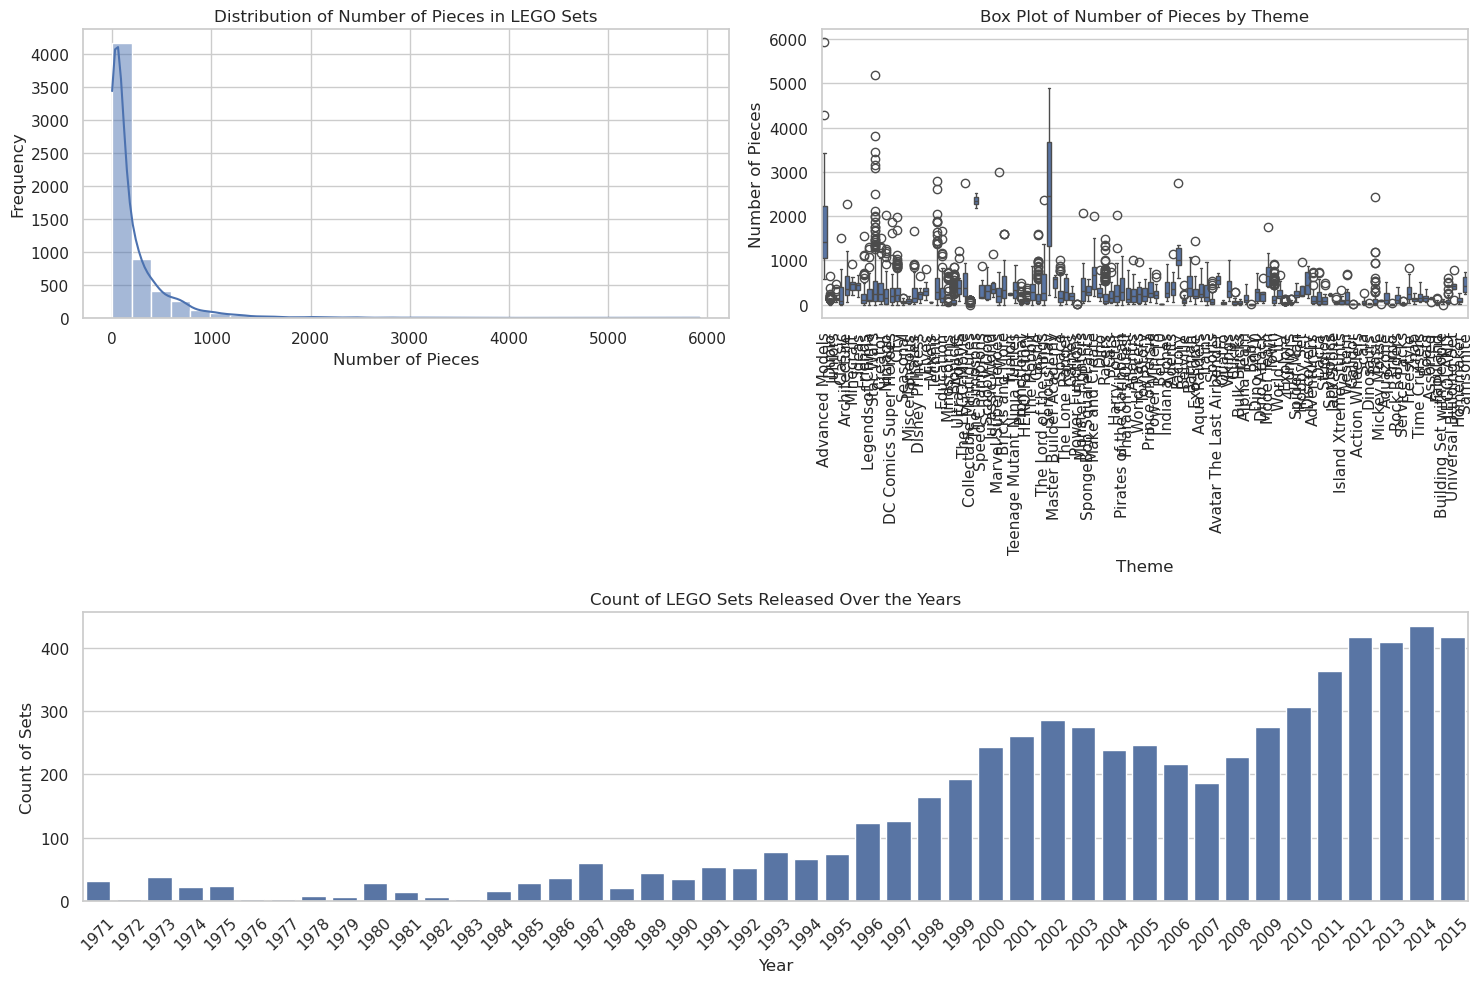

In [40]:
# Set up the visualizations
plt.figure(figsize=(15, 10))

# Histogram of the number of pieces
plt.subplot(2, 2, 1)
sns.histplot(lego_data['Pieces'].dropna(), bins=30, kde=True)
plt.title('Distribution of Number of Pieces in LEGO Sets')
plt.xlabel('Number of Pieces')
plt.ylabel('Frequency')

# Box plot of the number of pieces by theme
plt.subplot(2, 2, 2)
plt.xticks(rotation=90)
sns.boxplot(x='Theme', y='Pieces', data=lego_data.dropna(subset=['Pieces']))
plt.title('Box Plot of Number of Pieces by Theme')
plt.xlabel('Theme')
plt.ylabel('Number of Pieces')

# Count of LEGO sets released over the years
plt.subplot(2, 1, 2)
sns.countplot(x='Year', data=lego_data, order=sorted(lego_data['Year'].unique()))
plt.title('Count of LEGO Sets Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Sets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Conclusion:
https://chatgpt.com/share/66f21d3f-e128-8001-9d30-62bf4430955a
The analyses provide valuable insights into the LEGO sets dataset, revealing trends in complexity and popularity. The distribution of pieces and the variation among themes can inform future design decisions or marketing strategies for LEGO sets.

7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)


8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

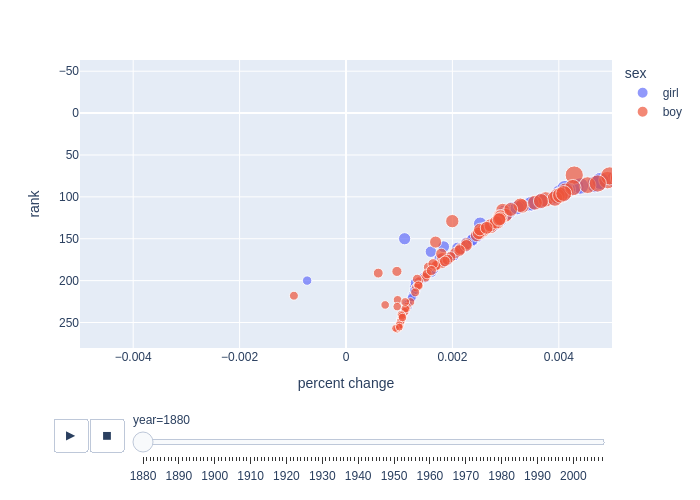

In [42]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Somewhat